# **Loading Data and Importing Modules**


In [1]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\spoorthy\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data= pd.read_csv('churn.csv', index_col = 0)

In [3]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


# **Understand More About The Data**

In [4]:
# Viewing the data of top 5 rows to loo the glimps of the data
data.head(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [5]:
# View the data of bottom 5 rows to look the glimps of the data
data.tail(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no
5000,VT,area_code_415,86,yes,34,no,9.3,16,2.51,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,0,no


In [6]:
#Getting the shape of dataset with rows and columns
print(data.shape)

(5000, 20)


In [7]:
#Getting all the columns
print("Features of the dataset:")
data.columns

Features of the dataset:


Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

**Breakdown of Our Features:**

●	state: Categorical, for the 51 states and the District of Columbia.

●	Area.code

●	account.length: how long the account has been active.

●	voice.plan: yes or no, voicemail plan.

●	voice.messages: number of voicemail messages.

●	intl.plan: yes or no, international plan.

●	intl.mins: minutes customer used service to make international calls.

●	intl.calls: total number of international calls.

●	intl.charge: total international charge.

●	day.mins: minutes customer used service during the day.

●	day.calls: total number of calls during the day.

●	day.charge: total charge during the day.

●	eve.mins: minutes customer used service during the evening.

●	eve.calls: total number of calls during the evening.

●	eve.charge: total charge during the evening.

●	night.mins: minutes customer used service during the night.

●	night.calls: total number of calls during the night.

●	night.charge: total charge during the night.

●	customer.calls: number of calls to customer service.

●	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


In [8]:
#Getting the data types of all the columns
data.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [9]:
data['day.charge']=data['day.charge'].astype('float64')
data['eve.mins']=data['eve.mins'].astype('float64')         

In [10]:
#check details about the data set
data.info()
#we see that we have 3333 entries and no null values are present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [11]:
data.nunique()

state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1961
eve.mins          1876
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [12]:
#Looking for the description of the dataset to get insights of the data
data.describe(include='all')

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
count,5000,5000,5000.00000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,51,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,area_code_415,NaN,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,158,2495,NaN,3677,NaN,4527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4293
mean,NaN,NaN,100.25860,NaN,7.755200,NaN,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400,NaN
std,NaN,NaN,39.69456,NaN,13.546393,NaN,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363,NaN
min,NaN,NaN,1.00000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,73.00000,NaN,0.000000,NaN,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000,NaN
50%,NaN,NaN,100.00000,NaN,0.000000,NaN,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000,NaN
75%,NaN,NaN,127.00000,NaN,17.000000,NaN,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000,NaN


In [13]:
#Printing the count of true and false in 'churn' feature
print(data.churn.value_counts())

no     4293
yes     707
Name: churn, dtype: int64


## Checking for Missing And Duplicate values

In [14]:
#check for count of missing values in each column.
data.isna().sum()
data.isnull().sum()
#as we see there are no missing values present in nay column.

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [15]:
data['day.charge'].fillna(data['day.charge'].mean(), inplace=True)

In [16]:
data['eve.mins'].fillna(data['eve.mins'].mean(), inplace=True)

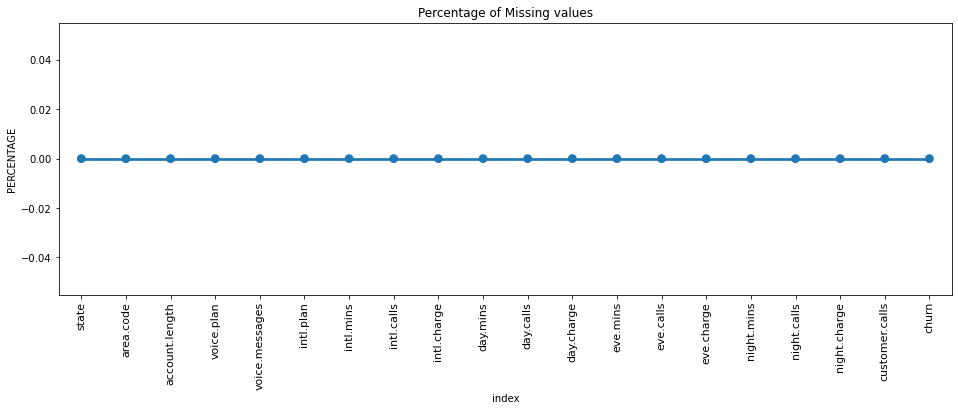

In [17]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0, data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [18]:
# Checking Duplicate Values
len(data[data.duplicated()])

0

***As of now There are 5000 rows and 20 columns in above dataset.***

***out of which there are 5 object data type i.e voice.plan, intl.plan, churn***

***8 float data type***, 

***7integer data type,*** 

***There are 2 missing values so need to do the missing value imputation,***

***And there are no duplicate value present.*** 

# **Exploratory Data Analysis Of The Data Set**

### Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [19]:
#convert string values(yes and no) of churn column to 1 and 0
data.loc[data.churn=='no', 'churn']=0
data.loc[data.churn=='yes', 'churn']=1
#convert to integer
data['churn']=data['churn'].astype('int32')

In [20]:
#Printing the unique value inside "churn" column
data["churn"].unique()

array([0, 1])

In [21]:
#Printing the count of true and false in 'churn' feature
print(data.churn.value_counts())

0    4293
1     707
Name: churn, dtype: int64


In [22]:
100*data['churn'].value_counts()/len(data['churn'])

0    85.86
1    14.14
Name: churn, dtype: float64

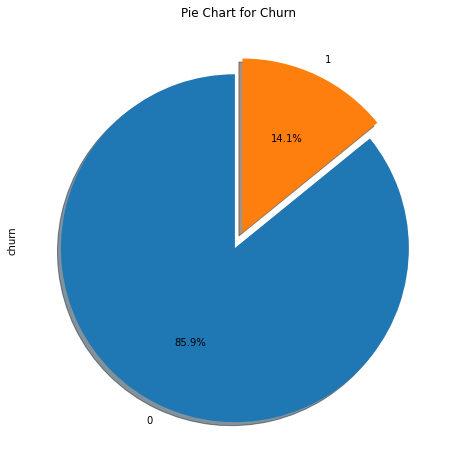

In [23]:
#To get the pie chart to analyze churn
data['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

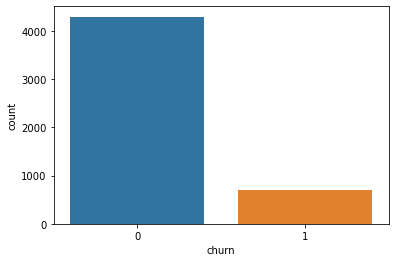

In [24]:
#let's see churn by using countplot
sns.countplot(x=data.churn)

<AxesSubplot:xlabel='churn'>

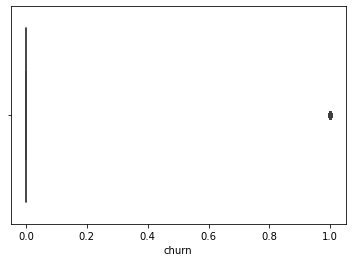

In [25]:
sns.boxplot(x=data['churn'])

***After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn***

### Analyzing State Column

In [26]:
#printing the unique value of sate column
data['state'].nunique()

51

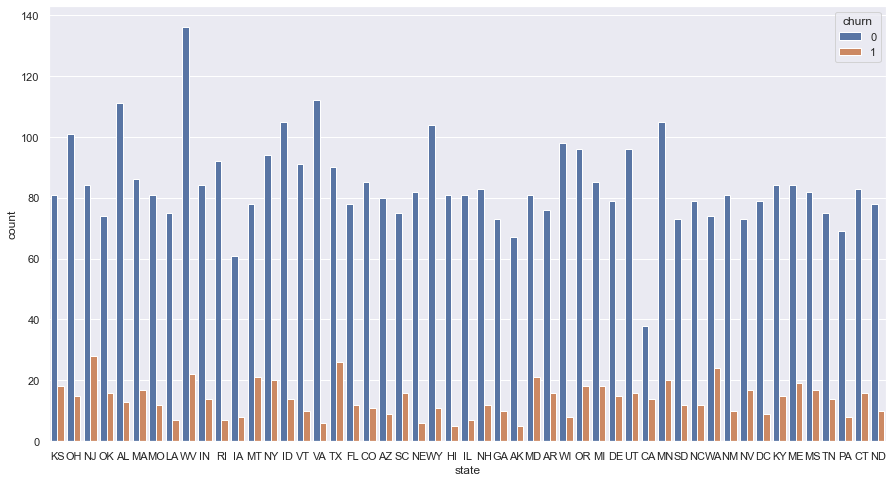

In [27]:
#Comparison churn with state by using countplot (barchart)
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', hue="churn", data=data)
plt.show()

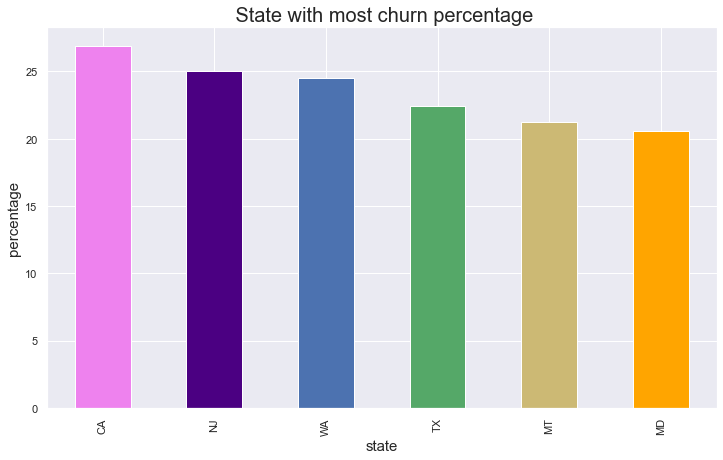

In [28]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((data.groupby(['state'])['churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [29]:
#calculate State vs Churn percentage
State_data = pd.crosstab(data["state"],data["churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

churn    0   1  Percentage_Churn
state                           
AK      67   5          6.944444
AL     111  13         10.483871
AR      76  16         17.391304
AZ      80   9         10.112360
CA      38  14         26.923077
CO      85  11         11.458333
CT      83  16         16.161616
DC      79   9         10.227273
DE      79  15         15.957447
FL      78  12         13.333333
GA      73  10         12.048193
HI      81   5          5.813953
IA      61   8         11.594203
ID     105  14         11.764706
IL      81   7          7.954545
IN      84  14         14.285714
KS      81  18         18.181818
KY      84  15         15.151515
LA      75   7          8.536585
MA      86  17         16.504854
MD      81  21         20.588235
ME      84  19         18.446602
MI      85  18         17.475728
MN     105  20         16.000000
MO      81  12         12.903226
MS      82  17         17.171717
MT      78  21         21.212121
NC      79  12         13.186813
ND      78

In [30]:
#show the most churn state of top 10 by ascending the above list
data.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(10)

state
CA    0.269231
NJ    0.250000
WA    0.244898
TX    0.224138
MT    0.212121
MD    0.205882
NV    0.188889
ME    0.184466
KS    0.181818
OK    0.177778
Name: churn, dtype: float64

***There is 51 unique state present who have different churn rate.*** 

***From the above analysis CA, NJ, WA, TX, MT, MD, NV, ME, KS, OK are the ones who have a higher churn rate of more than 21.***

 ***The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.***

### Analyzing "Area Code" column

In [31]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(data["area.code"],data["churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

churn             0    1  Percentage_Churn
area.code                                 
area_code_408  1082  177         14.058777
area_code_415  2149  346         13.867735
area_code_510  1062  184         14.767255


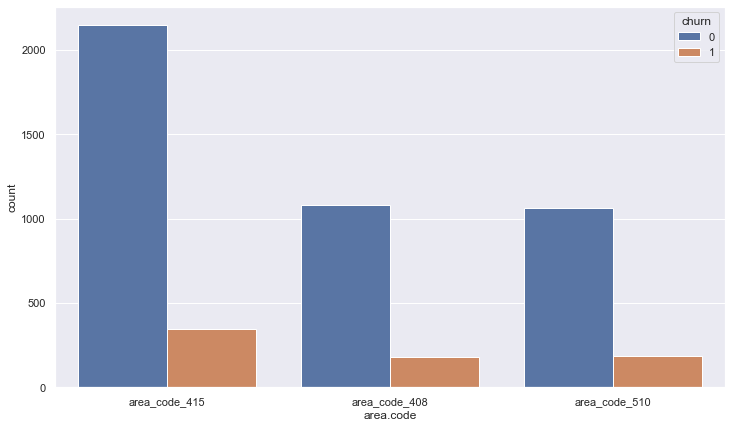

In [32]:
sns.set(style="darkgrid")
ax = sns.countplot(x='area.code', hue="churn", data=data)
plt.show()

***In the above data, we notice that there is only 3 unique value are there i.e 408,415,510 and the churn rate of these area codes are almost same.***

 ***we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.***

### STATE and AREA.CODE

 > By analysing the above plots and data its very difficult to predict churn customer from area code or state.
  
 > Both features are independent in nature. 
  
 > There are no use of this feature for predicting churn customer.
  
 > Having no relationship between churn and this features.

# Dropping Unused features

In [33]:
data1= data.drop(columns=['state','area.code'],axis=1)

In [34]:
data1.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
2,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
3,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
4,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
5,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


### Analyzing "Account length" column

In [35]:
#Separating churn and non churn customers
churn_df     = data1[data1["churn"] == bool(True)]
not_churn_df = data1[data1["churn"] == bool(False)]

<AxesSubplot:xlabel='account.length', ylabel='Density'>

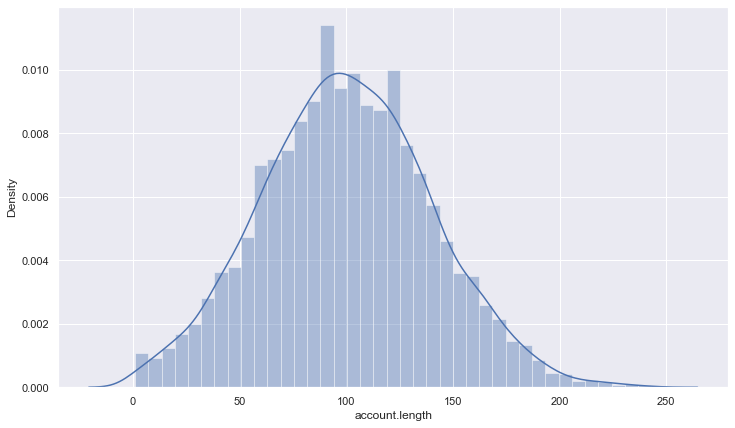

In [36]:
#Account length vs Churn
sns.distplot(data1['account.length'])

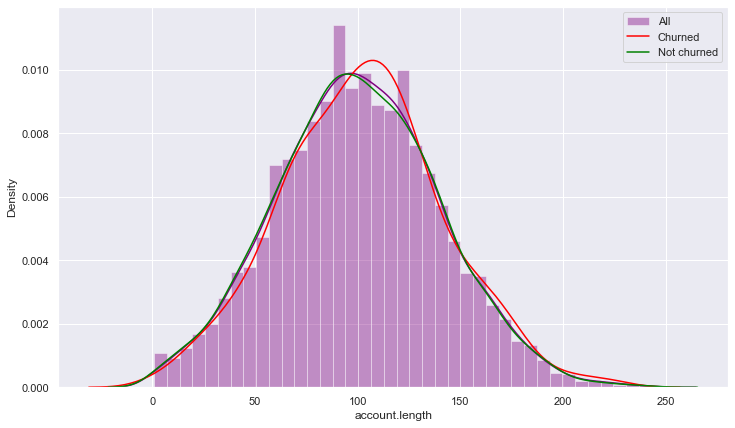

In [37]:
#comparison of churned account length and not churned account length 
sns.distplot(data1['account.length'],color = 'purple',label="All")
sns.distplot(churn_df['account.length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['account.length'],color = 'green',hist= False,label="Not churned")
plt.legend()

<Figure size 720x576 with 0 Axes>

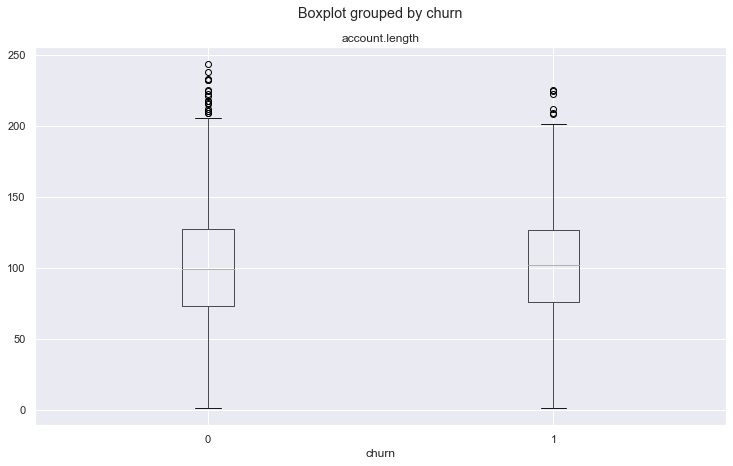

In [38]:
fig = plt.figure(figsize =(10, 8)) 
data1.boxplot(column='account.length', by='churn')
fig.suptitle('account.length', fontsize=14, fontweight='bold')
plt.show()

***After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.***

### Analyzing "International Plan" column

In [39]:
#Show count value of 'yes','no'
data1['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

In [40]:
#Show the unique data of "International plan"
data1["intl.plan"].unique()

array(['no', 'yes'], dtype=object)

In [41]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(data1["intl.plan"],data1["churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

churn         0    1  Percentage Churn
intl.plan                             
no         4019  508         11.221560
yes         274  199         42.071882


<AxesSubplot:xlabel='intl.plan', ylabel='count'>

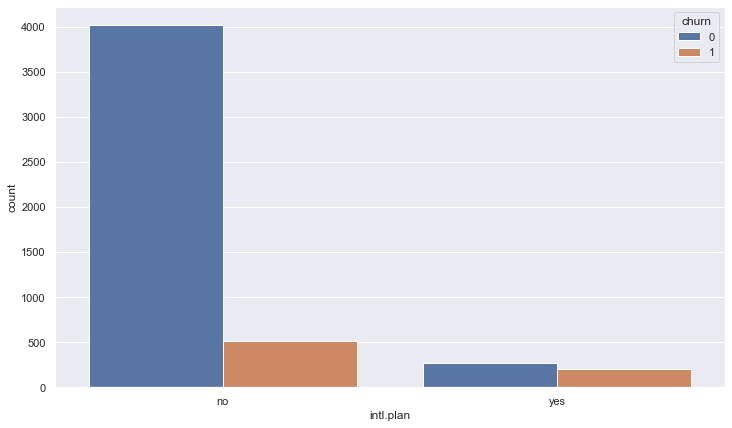

In [42]:
#Analysing by using countplot
sns.countplot(x='intl.plan',hue="churn",data = data1)

***From the above data we get***

***There are 4527 customers who  dont have a international plan.***

***There are 473 customers who have a international plan.***

***Among those who have a international plan 42.07 % people churn.***

***Whereas among those who dont have a international plan only 11.22 % people churn.***

***So basically the people who bought International plans are churning in big numbers.***

***Probably because of connectivity issues or high call charge.***

### Analyzing "Voice Plan" column

In [43]:
#show the unique value of the "Voice mail plan" column
data1["voice.plan"].unique()

array(['yes', 'no'], dtype=object)

In [44]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(data1["voice.plan"], data1["churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

churn          0    1  Percentage Churn
voice.plan                             
no          3072  605         16.453631
yes         1221  102          7.709751


<AxesSubplot:xlabel='voice.plan', ylabel='count'>

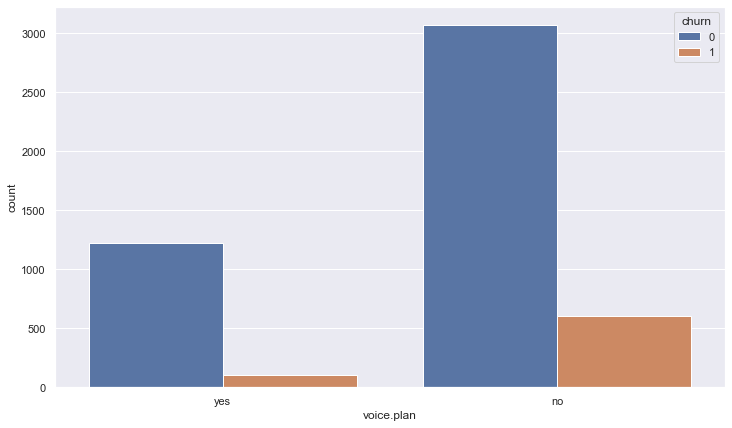

In [45]:
#Analysing by using countplot
sns.countplot(x='voice.plan',hue="churn",data = data1)

***As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.***

### Analyzing "Voice messages" column

In [46]:
#show the data of 'voice messages' 
data1['voice.messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52],
      dtype=int64)

In [47]:
#Printing the data of 'voice messages'
data1['voice.messages'].value_counts()

0     3678
31      83
28      67
29      67
33      66
24      64
27      64
30      58
26      58
32      57
23      52
25      51
22      47
36      45
37      43
39      42
34      41
35      41
21      41
38      41
20      32
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: voice.messages, dtype: int64

In [48]:
#Show the details of 'voice messages' data
data1['voice.messages'].describe()

count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice.messages, dtype: float64

<AxesSubplot:xlabel='voice.messages', ylabel='Density'>

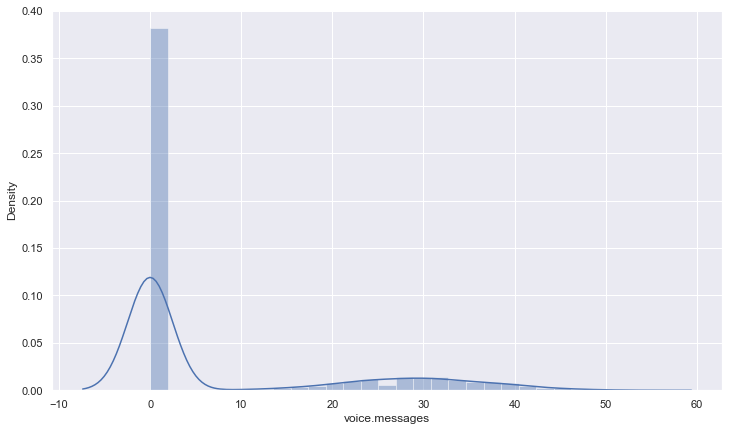

In [49]:
#Analysing by using displot diagram
sns.distplot(data1['voice.messages'])

<Figure size 720x576 with 0 Axes>

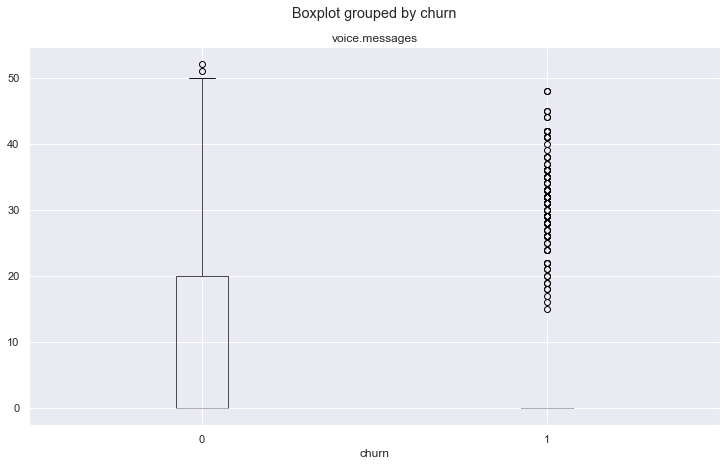

In [50]:
#Analysing by using boxplot diagram between 'voice messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
data1.boxplot(column='voice.messages', by='churn')
fig.suptitle('voice message', fontsize=14, fontweight='bold')
plt.show()

***After analyzing the above voice message feature data we get an insight that when there are more than 20 voice-mail messages then  there is a churn***

***For that, we need to improve the voice message quality.***

### Analyzing "Customer calls" column

In [51]:
#Printing the data of customer service calls 
data1['customer.calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: customer.calls, dtype: int64

In [52]:
#Calculating the Customer calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(data1['customer.calls'],data1["churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

churn              0    1  Percentage_Churn
customer.calls                             
0                902  121         11.827957
1               1596  190         10.638298
2               1005  122         10.825200
3                592   73         10.977444
4                141  111         44.047619
5                 38   58         60.416667
6                 12   22         64.705882
7                  6    7         53.846154
8                  1    1         50.000000
9                  0    2        100.000000


<AxesSubplot:xlabel='customer.calls', ylabel='count'>

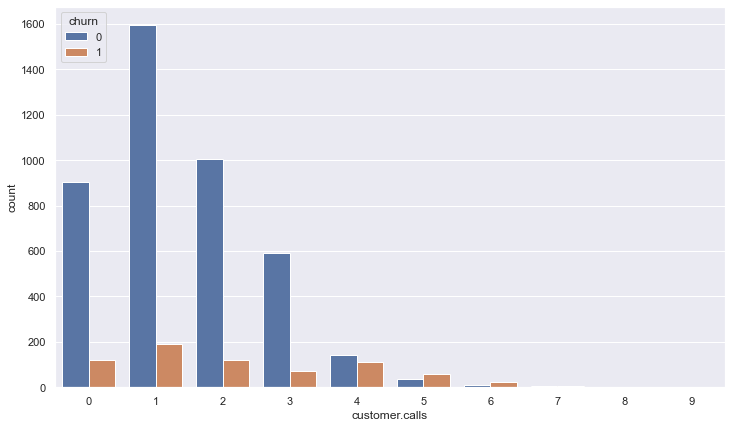

In [53]:
#Analysing using countplot
sns.countplot(x='customer.calls',hue="churn",data = data1)

<Figure size 720x576 with 0 Axes>

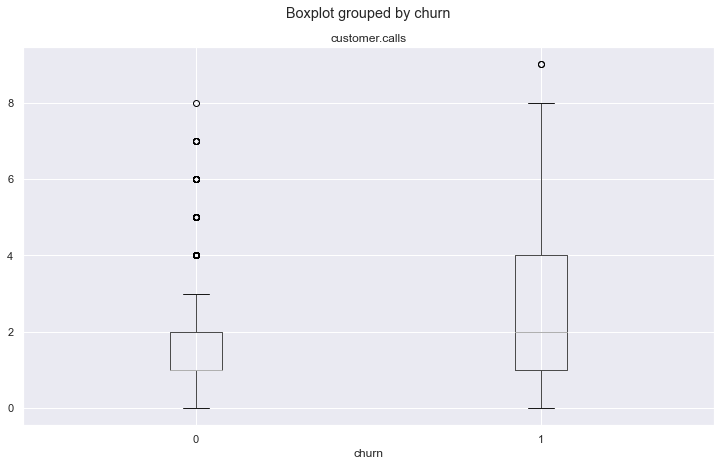

In [54]:
fig = plt.figure(figsize =(10, 8)) 
data1.boxplot(column='customer.calls', by='churn')
fig.suptitle('customer.calls', fontsize=14, fontweight='bold')
plt.show()

***It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.***

***The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,***

***And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.***

***So operator should work to improve the service call.***

### Analyzing all calls minutes,all calls, all calls charge together
***As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.***

In [55]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['day.calls'].mean())

churn
0     99.899604
1    100.817539
Name: day.calls, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='day.calls'>

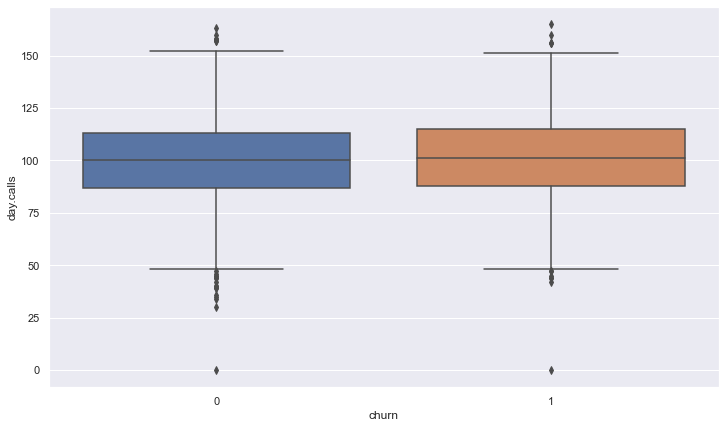

In [56]:
sns.boxplot(x='churn', y='day.calls', data=data1)

In [57]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['day.mins'].mean())

churn
0    175.746564
1    207.870580
Name: day.mins, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='day.mins'>

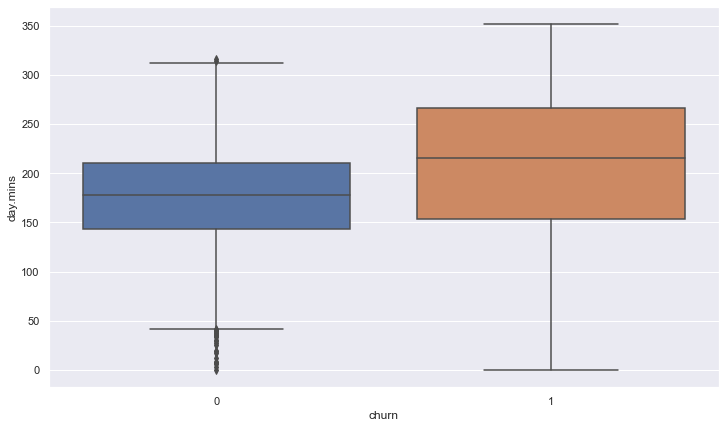

In [58]:
sns.boxplot(x='churn', y='day.mins', data=data1)

In [59]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['day.charge'].mean())

churn
0    29.881958
1    35.338416
Name: day.charge, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='day.charge'>

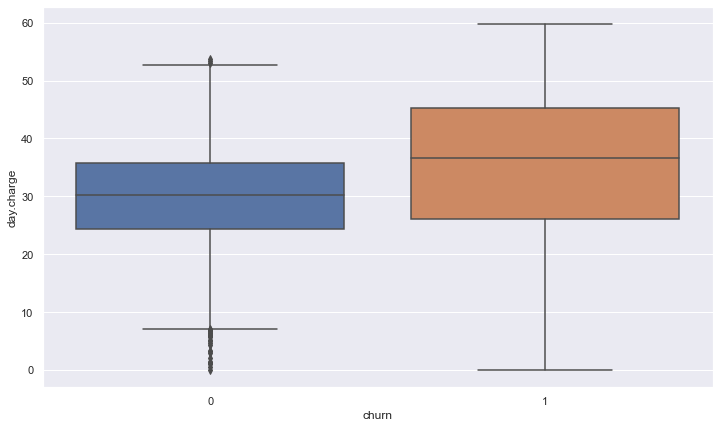

In [60]:
sns.boxplot(x='churn', y='day.charge', data=data1)

<AxesSubplot:xlabel='day.mins', ylabel='day.charge'>

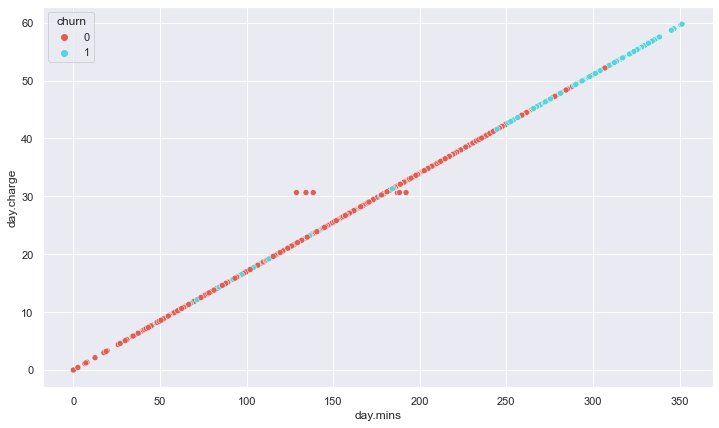

In [61]:
#show the relation using scatter plot
sns.scatterplot(x="day.mins", y="day.charge", hue="churn", data=data1, palette='hls')

In [62]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['eve.calls'].mean())

churn
0    100.241556
1     99.884017
Name: eve.calls, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='eve.calls'>

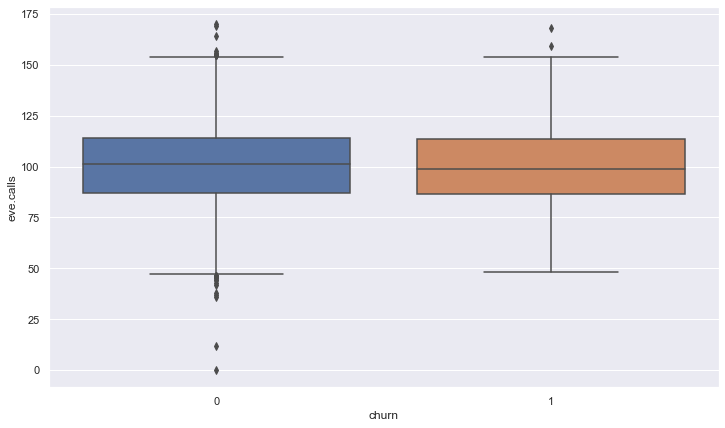

In [63]:
sns.boxplot(x='churn', y='eve.calls', data=data1)

In [64]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['eve.mins'].mean())

churn
0    198.755292
1    211.662179
Name: eve.mins, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='eve.mins'>

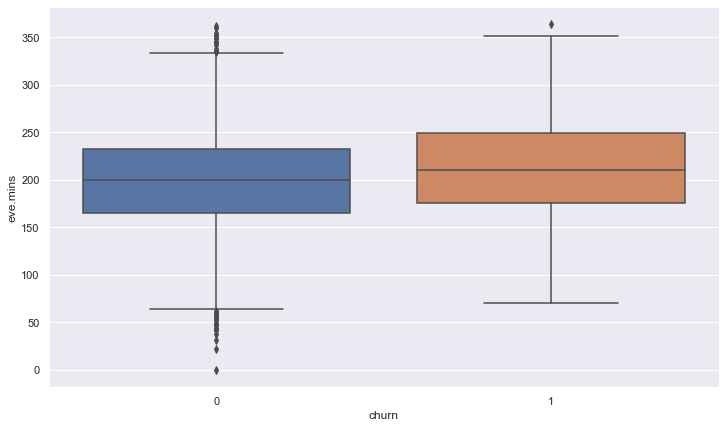

In [65]:
sns.boxplot(x='churn', y='eve.mins', data=data1)

In [66]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['eve.charge'].mean())

churn
0    16.898654
1    17.999562
Name: eve.charge, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='eve.charge'>

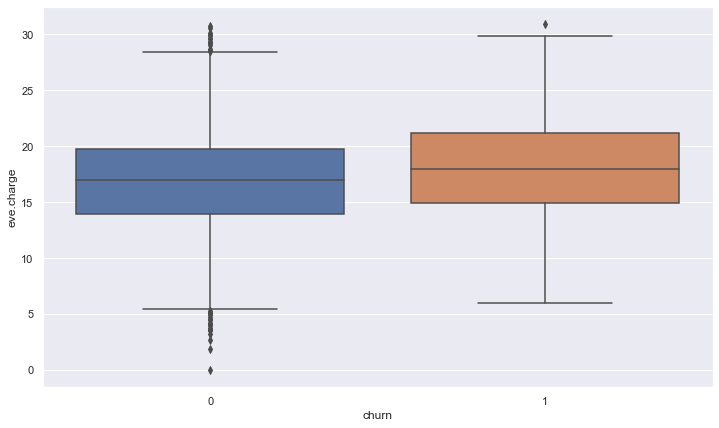

In [67]:
sns.boxplot(x='churn', y='eve.charge', data=data1)

<AxesSubplot:xlabel='eve.mins', ylabel='eve.charge'>

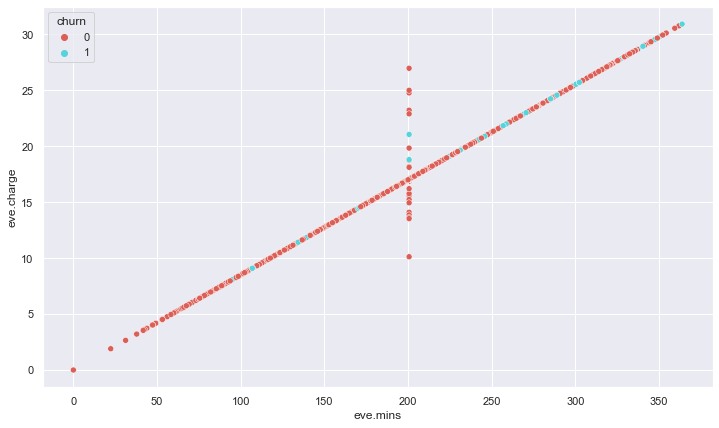

In [68]:
#show the relation using scatter plot
sns.scatterplot(x="eve.mins", y="eve.charge", hue="churn", data=data1, palette='hls')

In [69]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['night.calls'].mean())

churn
0    99.975775
1    99.575672
Name: night.calls, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='night.calls'>

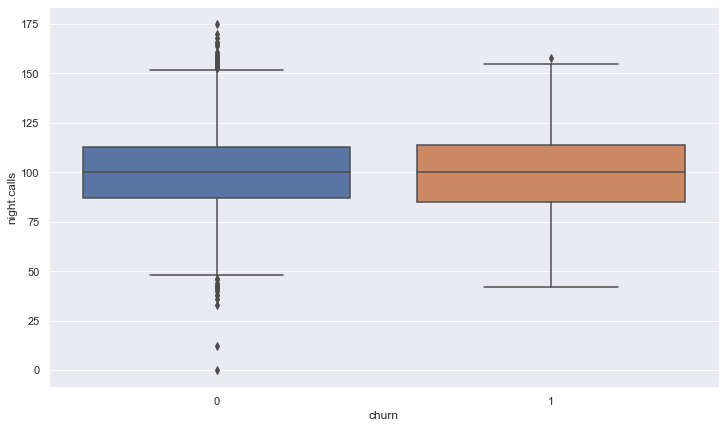

In [70]:
sns.boxplot(x='churn', y='night.calls', data=data1)

In [71]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['night.charge'].mean())

churn
0    8.975593
1    9.273607
Name: night.charge, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='night.charge'>

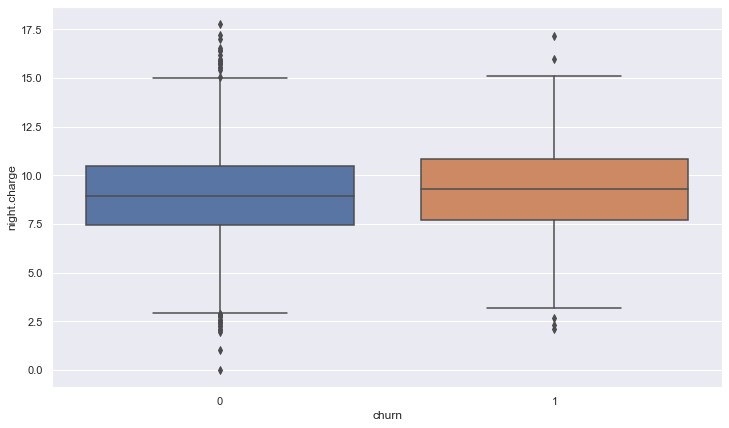

In [72]:
sns.boxplot(x='churn', y='night.charge', data=data1)

In [73]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['night.mins'].mean())

churn
0    199.455113
1    206.078218
Name: night.mins, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='night.mins'>

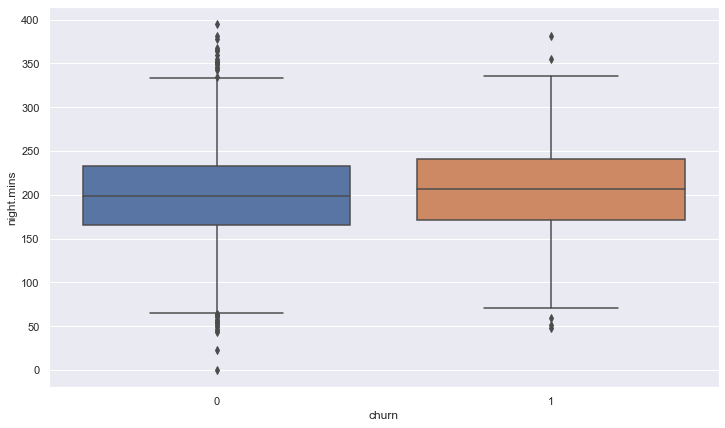

In [74]:
sns.boxplot(x='churn', y='night.mins', data=data1)

<AxesSubplot:xlabel='night.mins', ylabel='night.charge'>

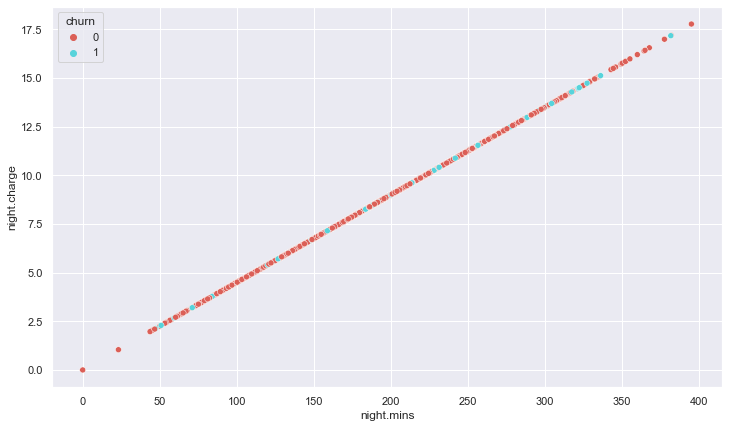

In [75]:
#show the relation using scatter plot
sns.scatterplot(x="night.mins", y="night.charge", hue="churn", data=data1, palette='hls')

In [76]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['intl.mins'].mean())

churn
0    10.190869
1    10.692362
Name: intl.mins, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='intl.mins'>

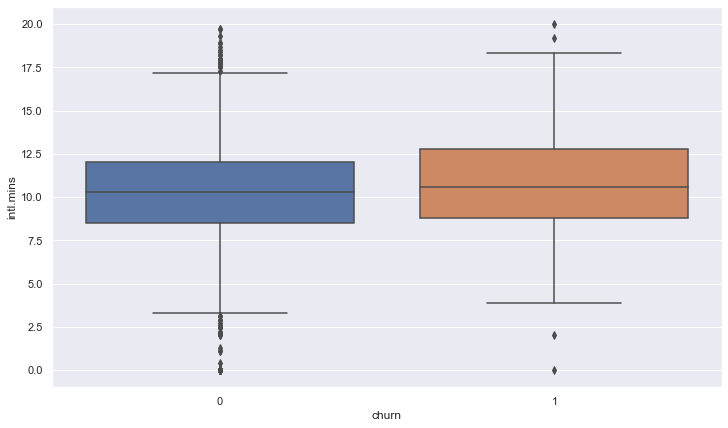

In [77]:
sns.boxplot(x='churn', y='intl.mins', data=data1)

In [78]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['intl.calls'].mean())

churn
0    4.481947
1    4.151344
Name: intl.calls, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='intl.calls'>

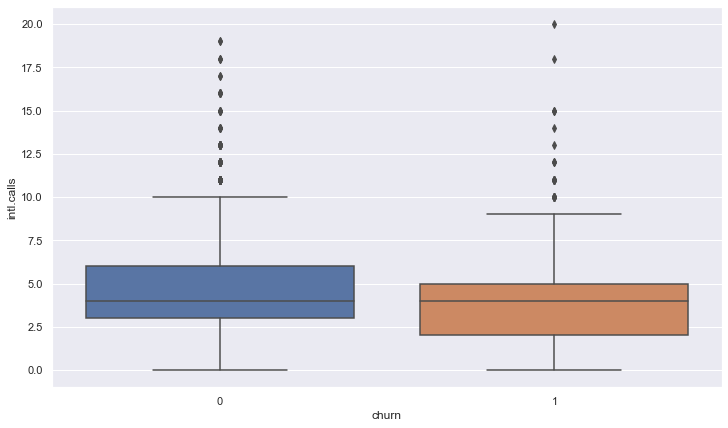

In [79]:
sns.boxplot(x='churn', y='intl.calls', data=data1)

In [80]:
#Print the mean value of churned and not churned customer 
print(data1.groupby(["churn"])['intl.charge'].mean())

churn
0    2.752055
1    2.887426
Name: intl.charge, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='intl.charge'>

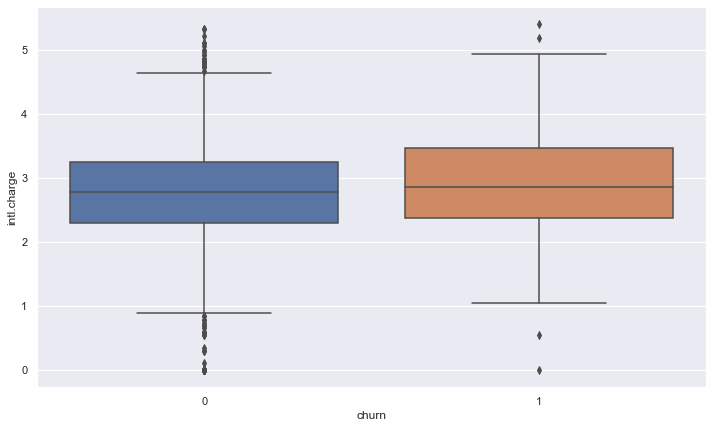

In [81]:
sns.boxplot(x='churn', y='intl.charge', data=data1)

<AxesSubplot:xlabel='intl.mins', ylabel='intl.charge'>

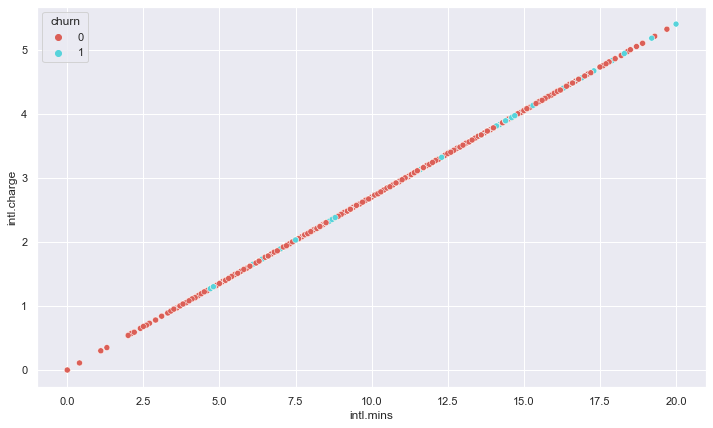

In [82]:
#show the relation using scatter plot
sns.scatterplot(x="intl.mins", y="intl.charge", hue="churn", data=data1, palette='hls')

In [83]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = data1['day.charge'].mean()/data1['day.mins'].mean()
eve_charge_perm = data1['eve.charge'].mean()/data1['eve.mins'].mean()
night_charge_perm = data1['night.charge'].mean()/data1['night.mins'].mean()
int_charge_perm= data1['intl.charge'].mean()/data1['intl.mins'].mean()

In [84]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.1700243381664752, 0.08502489938709792, 0.04500054443394409, 0.2700502252045927]


<AxesSubplot:>

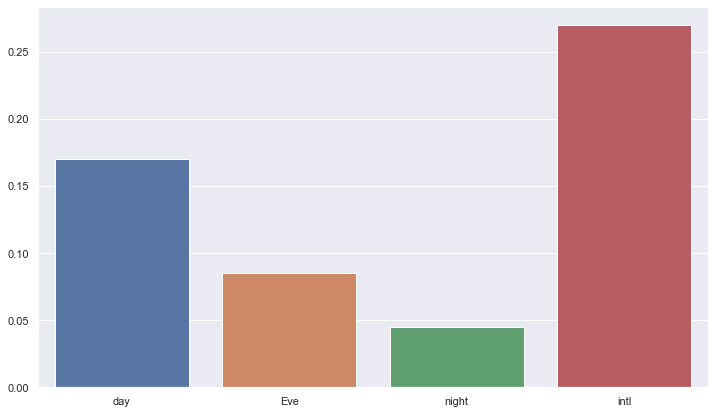

In [85]:
sns.barplot(x=['day','Eve','night','intl'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])


***After analyzing the above dataset we have noticed that total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out.***

## Graphical Analysis

### UNIVARIATE ANALYSIS

In Univariate Analysis we analyze data over a single column from the numerical dataset, for this we use 3 types of plot which are **box plot, strip plot, dis plot.** 



<Figure size 1224x72 with 0 Axes>

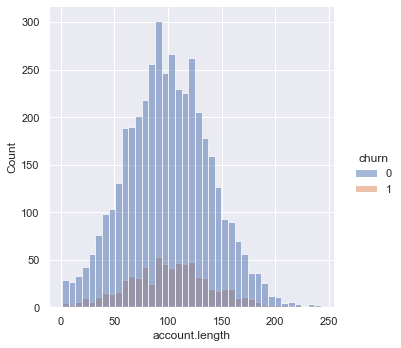

<Figure size 1224x72 with 0 Axes>

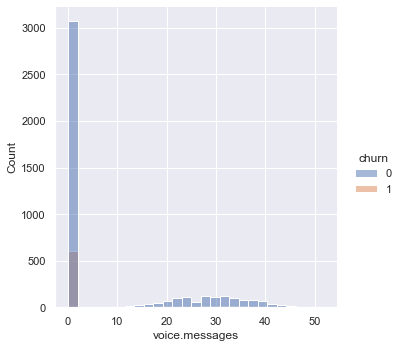

<Figure size 1224x72 with 0 Axes>

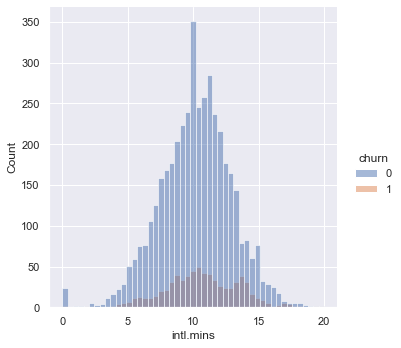

<Figure size 1224x72 with 0 Axes>

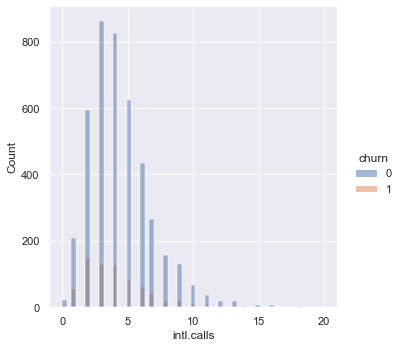

<Figure size 1224x72 with 0 Axes>

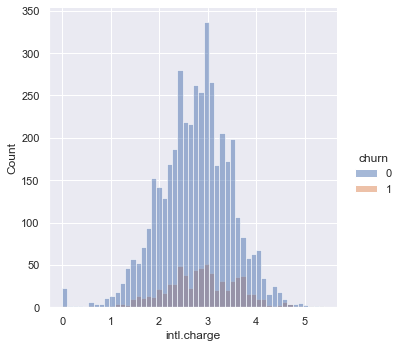

<Figure size 1224x72 with 0 Axes>

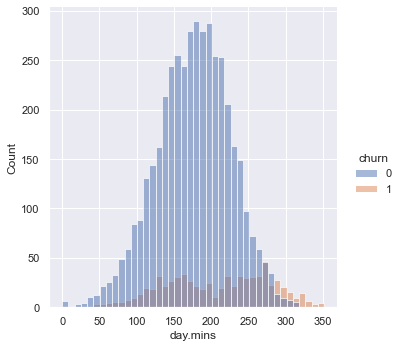

<Figure size 1224x72 with 0 Axes>

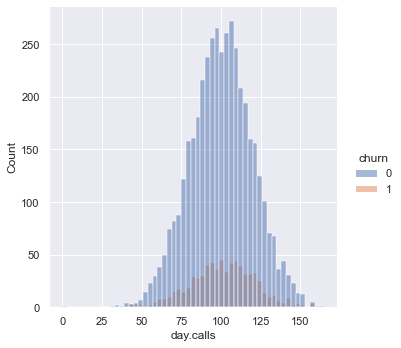

<Figure size 1224x72 with 0 Axes>

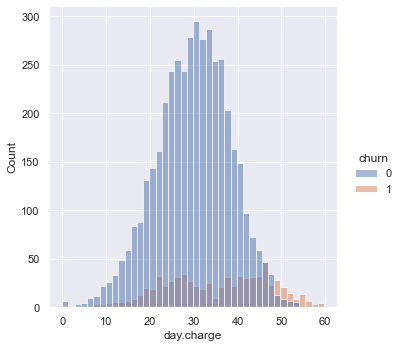

<Figure size 1224x72 with 0 Axes>

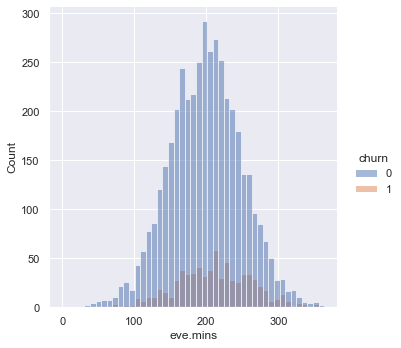

<Figure size 1224x72 with 0 Axes>

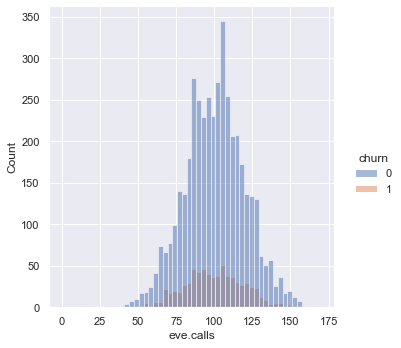

<Figure size 1224x72 with 0 Axes>

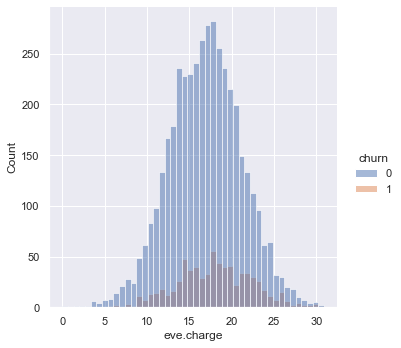

<Figure size 1224x72 with 0 Axes>

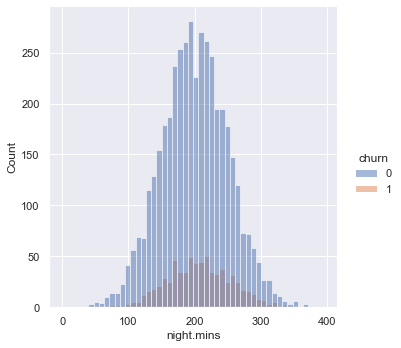

<Figure size 1224x72 with 0 Axes>

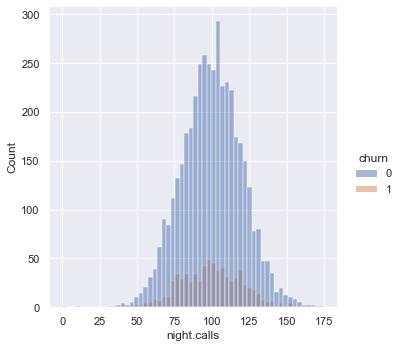

<Figure size 1224x72 with 0 Axes>

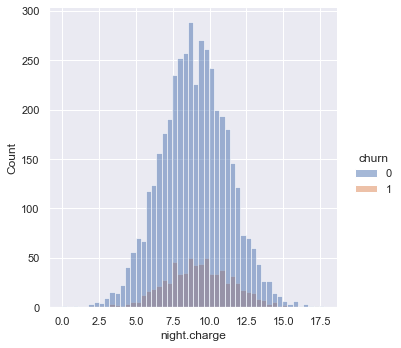

<Figure size 1224x72 with 0 Axes>

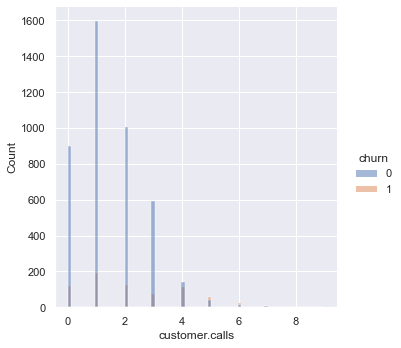

<Figure size 1224x72 with 0 Axes>

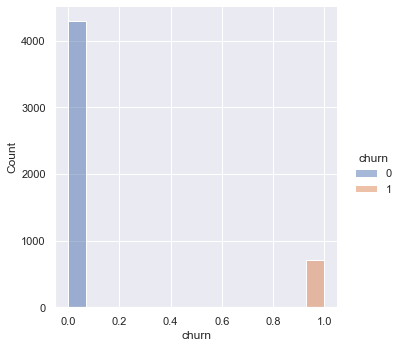

In [86]:
df1=data1.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column, hue='churn')
plt.show()

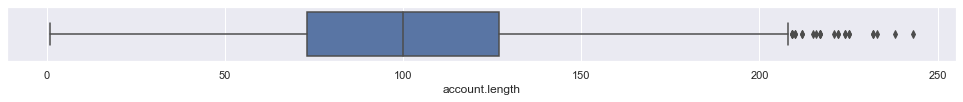

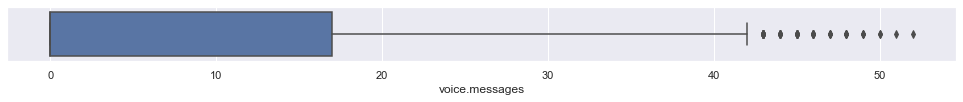

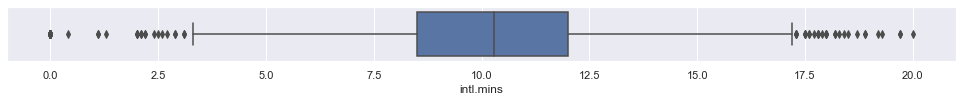

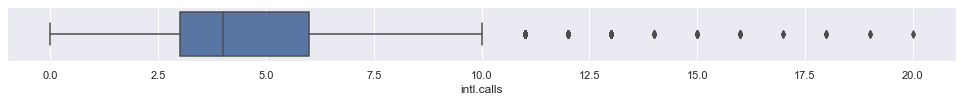

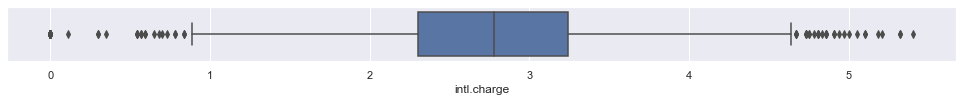

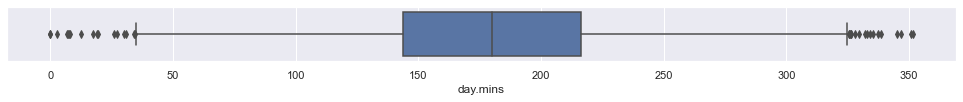

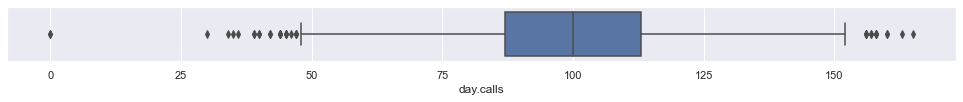

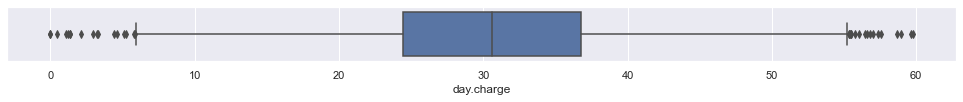

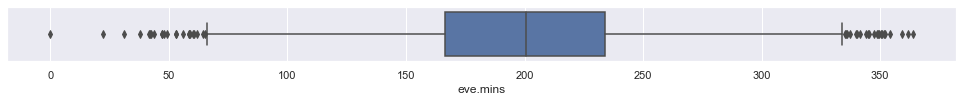

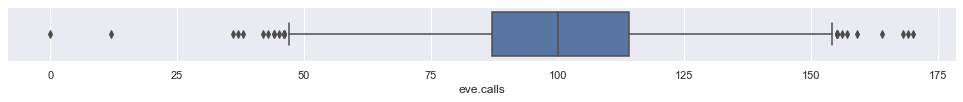

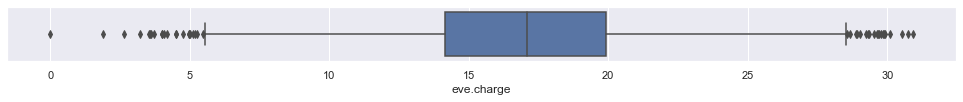

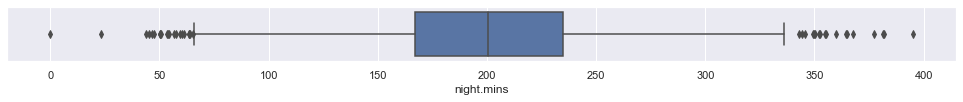

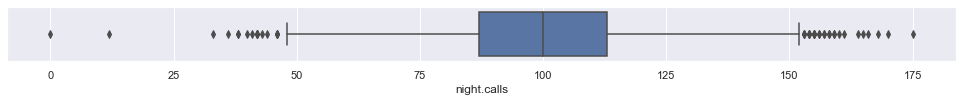

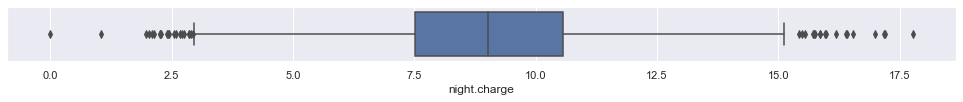

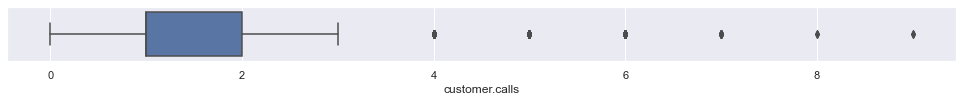

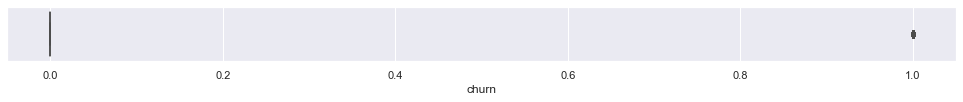

In [87]:
#Printing boxplot for each numerical column present in the data set
df1=data1.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column, hue='churn')
plt.show()

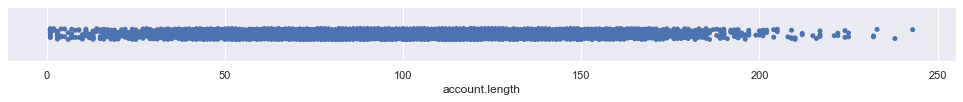

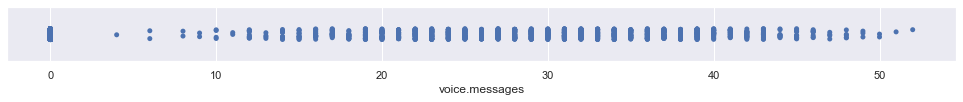

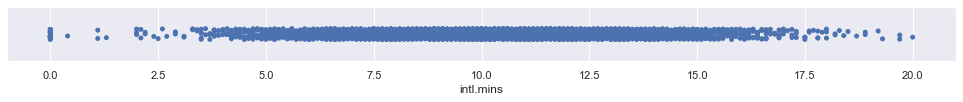

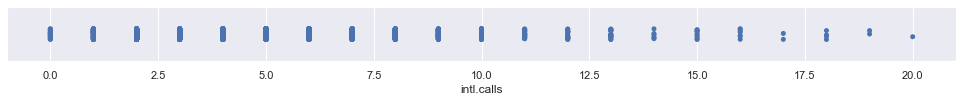

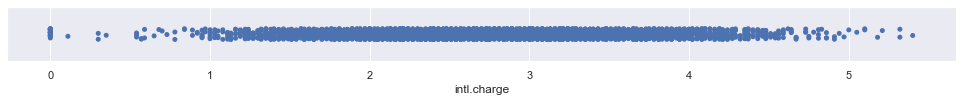

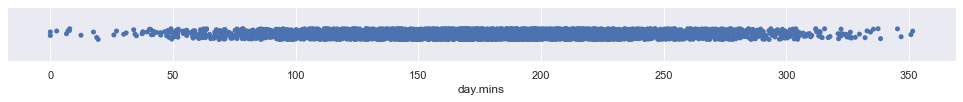

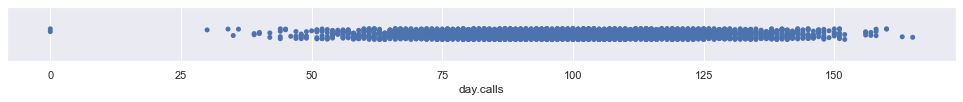

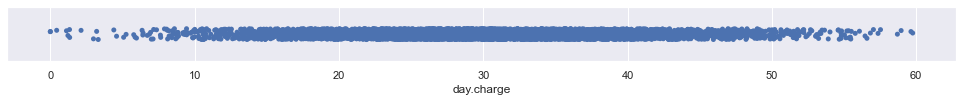

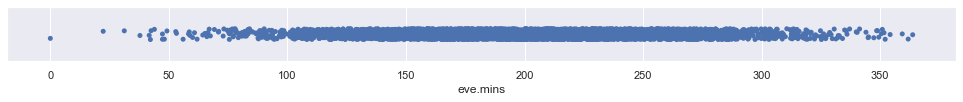

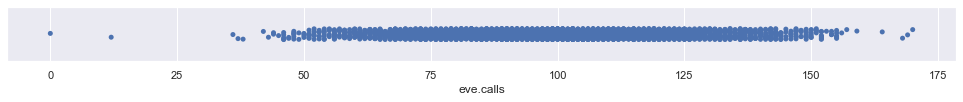

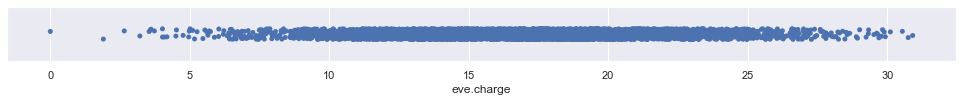

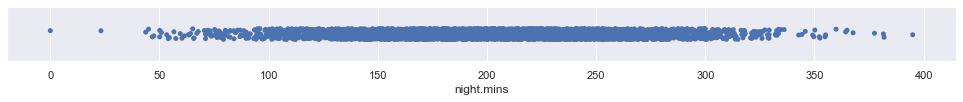

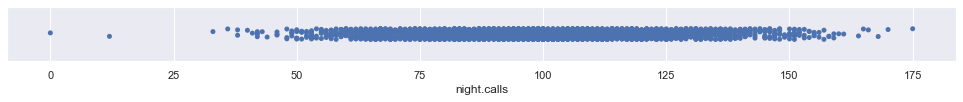

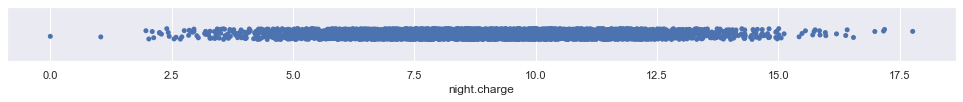

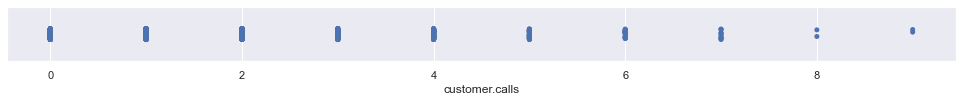

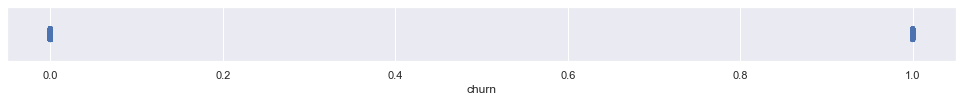

In [88]:
#Printing strip plot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column, hue='churn')
plt.show()

### converting categorical variables into dummy variables

In [89]:
data1_dummies = pd.get_dummies(data1)
data1_dummies.head()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan_no,voice.plan_yes,intl.plan_no,intl.plan_yes
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,0,1,1,0
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,0,1,1,0
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,1,0,1,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,1,0,0,1
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,1,0,0,1


### Multivariate Analysis
In Multivariate Analysis we analyze data by taking more than two columns into consideration from a dataset,for this we using **correlation plot,correlation matrix, correletaion heatmap, pair plot**

<AxesSubplot:>

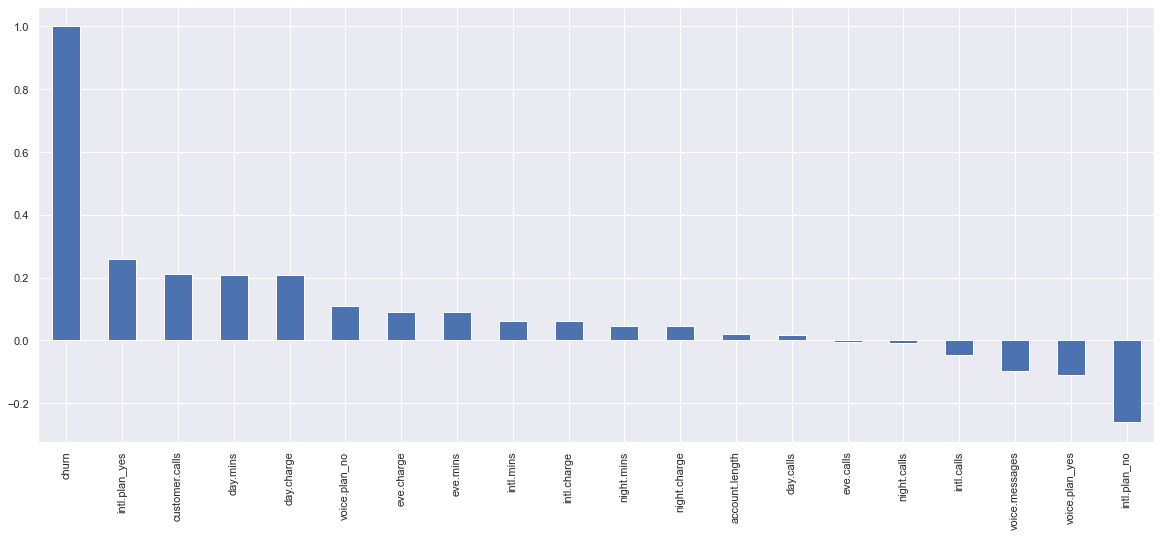

In [90]:
#build correlation of all predictors with churn
plt.figure(figsize=(20,8))
data1_dummies.corr()['churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

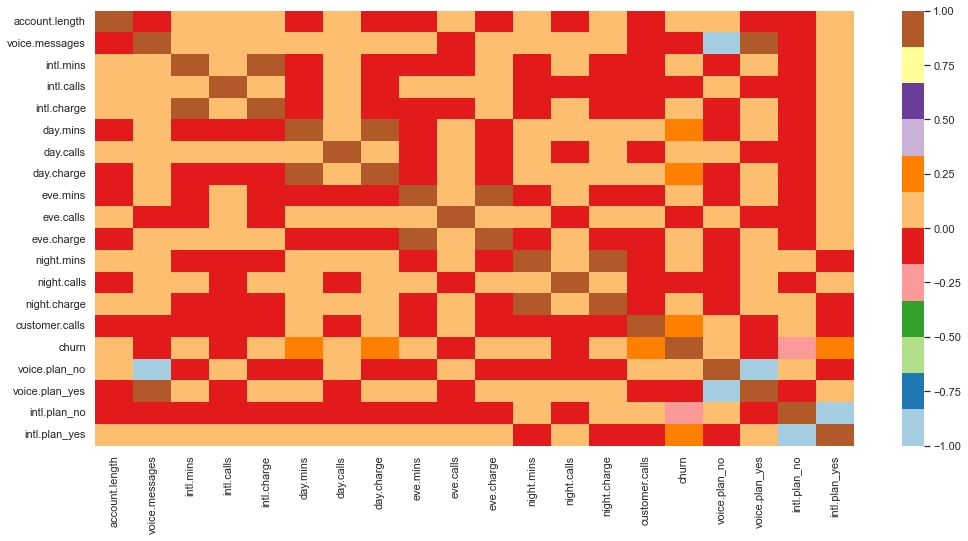

In [91]:
plt.figure(figsize=(17,8))
sns.heatmap(data1_dummies.corr(), cmap="Paired")

<AxesSubplot:>

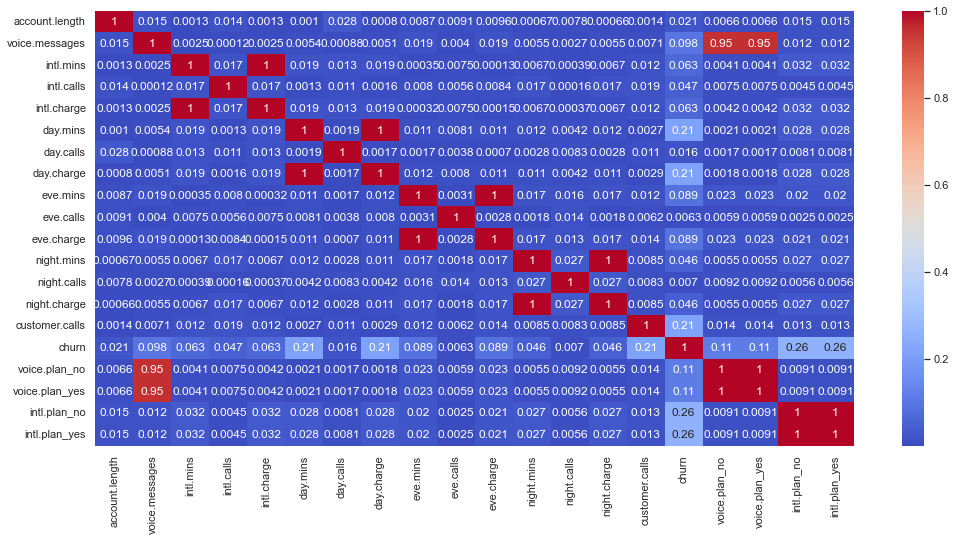

In [92]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=data1_dummies.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Finding Outliers in Data

In [93]:
def find_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
   return outliers

In [94]:
outliers=find_outliers_IQR(data1)

In [95]:
outliers.head(20)

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.6,NaN,29.89,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  24 non-null     float64
 1   voice.plan      0 non-null      object 
 2   voice.messages  60 non-null     float64
 3   intl.plan       0 non-null      object 
 4   intl.mins       72 non-null     float64
 5   intl.calls      118 non-null    float64
 6   intl.charge     72 non-null     float64
 7   day.mins        34 non-null     float64
 8   day.calls       35 non-null     float64
 9   day.charge      34 non-null     float64
 10  eve.mins        45 non-null     float64
 11  eve.calls       27 non-null     float64
 12  eve.charge      42 non-null     float64
 13  night.mins      39 non-null     float64
 14  night.calls     43 non-null     float64
 15  night.charge    39 non-null     float64
 16  customer.calls  399 non-null    float64
 17  churn           707 non-null    f

## Dropping categorical data from outliers dataframe

In [97]:
outliers=outliers.drop(columns=['voice.plan','intl.plan','customer.calls','churn'],axis=1)

In [98]:
outliers.head()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  24 non-null     float64
 1   voice.messages  60 non-null     float64
 2   intl.mins       72 non-null     float64
 3   intl.calls      118 non-null    float64
 4   intl.charge     72 non-null     float64
 5   day.mins        34 non-null     float64
 6   day.calls       35 non-null     float64
 7   day.charge      34 non-null     float64
 8   eve.mins        45 non-null     float64
 9   eve.calls       27 non-null     float64
 10  eve.charge      42 non-null     float64
 11  night.mins      39 non-null     float64
 12  night.calls     43 non-null     float64
 13  night.charge    39 non-null     float64
dtypes: float64(14)
memory usage: 715.0 KB


In [100]:
outlier_data=outliers[outliers.values>=0]
outlier_data

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.6,NaN,29.89,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN
4982,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.3,NaN,28.93,NaN,NaN,NaN
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.3,NaN,28.93,NaN,NaN,NaN


In [101]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 4 to 5000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  26 non-null     float64
 1   voice.messages  65 non-null     float64
 2   intl.mins       147 non-null    float64
 3   intl.calls      128 non-null    float64
 4   intl.charge     147 non-null    float64
 5   day.mins        74 non-null     float64
 6   day.calls       41 non-null     float64
 7   day.charge      74 non-null     float64
 8   eve.mins        92 non-null     float64
 9   eve.calls       29 non-null     float64
 10  eve.charge      89 non-null     float64
 11  night.mins      80 non-null     float64
 12  night.calls     54 non-null     float64
 13  night.charge    80 non-null     float64
dtypes: float64(14)
memory usage: 80.2 KB


In [102]:
outlier_data['churn']=data1['churn']

In [103]:
outlier_data

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,churn
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.6,NaN,29.89,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,0
4982,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,0
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.3,NaN,28.93,NaN,NaN,NaN,1
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.3,NaN,28.93,NaN,NaN,NaN,1


In [104]:
outlier_data1=outlier_data[~outlier_data.index.duplicated(keep='first')]
outlier_data1

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,churn
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,5.26,NaN,NaN,NaN,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.6,NaN,29.89,NaN,NaN,NaN,0
16,NaN,NaN,NaN,NaN,NaN,332.9,NaN,56.59,NaN,NaN,NaN,NaN,NaN,NaN,1
23,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,NaN,NaN,17.7,NaN,4.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4977,NaN,NaN,19.7,NaN,5.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4982,NaN,NaN,NaN,NaN,NaN,7.2,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,0
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.3,NaN,28.93,NaN,NaN,NaN,1


In [105]:
outlier_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 4 to 5000
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  24 non-null     float64
 1   voice.messages  60 non-null     float64
 2   intl.mins       72 non-null     float64
 3   intl.calls      118 non-null    float64
 4   intl.charge     72 non-null     float64
 5   day.mins        34 non-null     float64
 6   day.calls       35 non-null     float64
 7   day.charge      34 non-null     float64
 8   eve.mins        45 non-null     float64
 9   eve.calls       27 non-null     float64
 10  eve.charge      42 non-null     float64
 11  night.mins      39 non-null     float64
 12  night.calls     43 non-null     float64
 13  night.charge    39 non-null     float64
 14  churn           478 non-null    int32  
dtypes: float64(14), int32(1)
memory usage: 57.9 KB


0    391
1     87
Name: churn, dtype: int64


<AxesSubplot:ylabel='churn'>

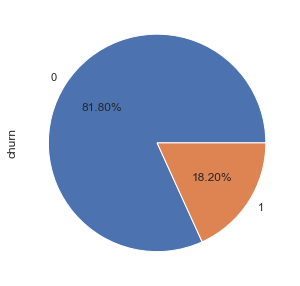

In [106]:
print(outlier_data1.churn.value_counts())
outlier_data1['churn'].value_counts().plot(kind="pie",autopct="%1.2f%%",figsize=(5,5))

### There are 391 customers who are outliers but they are not churns customers
### And 87 customers are outliers but they are churns

<AxesSubplot:>

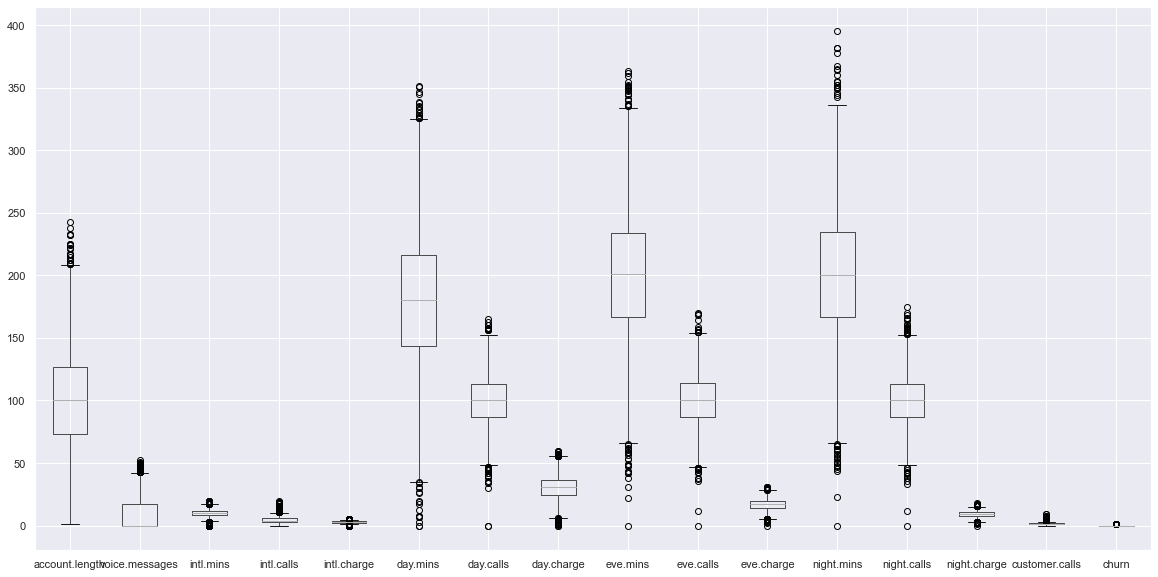

In [107]:
data1.boxplot(figsize=(20,10))

# Removing not churn customer outliers

In [108]:
nc=outlier_data1.index[outlier_data1['churn']==0]

In [109]:
ncco=data1.drop(nc)

In [110]:
ncco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4609 entries, 1 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  4609 non-null   int64  
 1   voice.plan      4609 non-null   object 
 2   voice.messages  4609 non-null   int64  
 3   intl.plan       4609 non-null   object 
 4   intl.mins       4609 non-null   float64
 5   intl.calls      4609 non-null   int64  
 6   intl.charge     4609 non-null   float64
 7   day.mins        4609 non-null   float64
 8   day.calls       4609 non-null   int64  
 9   day.charge      4609 non-null   float64
 10  eve.mins        4609 non-null   float64
 11  eve.calls       4609 non-null   int64  
 12  eve.charge      4609 non-null   float64
 13  night.mins      4609 non-null   float64
 14  night.calls     4609 non-null   int64  
 15  night.charge    4609 non-null   float64
 16  customer.calls  4609 non-null   int64  
 17  churn           4609 non-null   i

# **CONCLUSION:**

***After performing exploratory data analysis on the data set, this is what we have incurred from data:***
* ***There are some states where the churn rate is high as compared to others may be due to low network coverage.***
****Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns***
****In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge***
****IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good***.
****Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls,  Total eve charge, Total night minutes,  Total night calls,  Total night charge, these columns didn't play any kind of role regarding the churn rate.***
****In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.***
****In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.*** 

### **RECCOMENDATIONS:**


* ***Improve network coverage churned state***
*  ***In international plan provide some discount plan to the customer***
*  ***Improve the voice mail quality or take feedback from the customer***
*  ***Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it as soon as possible***





In [111]:
ncco.to_csv('updated_churn.csv')

# Model building

In [2]:
df2 = pd.read_csv('updated_churn.csv', index_col = 0)

encode = LabelEncoder()
df2['voice.plan'] = encode.fit_transform(df2['voice.plan'])
df2['intl.plan'] = encode.fit_transform(df2['intl.plan'])

scaler = MinMaxScaler()
df2.iloc[:,[0,2,4,6,7,9,10,12,13,15,5,8,11,14]] = scaler.fit_transform(df2.iloc[:,[0,2,4,6,7,9,10,12,13,15,5,8,11,14]])

df2.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
1,0.566964,1,0.520833,0,0.500,0.15,0.500000,0.754196,0.666667,0.754183,0.441384,0.429752,0.441502,0.590365,0.422414,0.590426,1,0
2,0.473214,1,0.541667,0,0.685,0.15,0.685185,0.459744,0.745455,0.459672,0.435002,0.462810,0.435178,0.619390,0.525862,0.619681,1,0
3,0.607143,0,0.000000,0,0.610,0.25,0.609259,0.692461,0.690909,0.692436,0.185422,0.520661,0.185375,0.344704,0.534483,0.345080,0,0
5,0.330357,0,0.000000,1,0.505,0.15,0.505556,0.474253,0.684848,0.474230,0.276453,0.619835,0.276680,0.417415,0.681034,0.417553,3,0
6,0.522321,0,0.000000,1,0.315,0.30,0.314815,0.635562,0.593939,0.635542,0.519315,0.446281,0.519368,0.468282,0.655172,0.468750,0,0


In [3]:
df2.shape

(4609, 18)

In [4]:
X = df2.drop(labels='churn', axis=1)
y = df2['churn']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle= True, random_state=27, stratify=y)

# Oversampling

In [6]:
#SMOTE Technique
!pip install imbalanced-learn --upgrade
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Requirement already up-to-date: imbalanced-learn in c:\users\spoorthy\anaconda3\lib\site-packages (0.10.0)
Before Counter({0: 2926, 1: 530})
After Counter({1: 2926, 0: 2926})


In [7]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 2926, 1: 530})
After Counter({1: 2909, 0: 2909})


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_train_pred1_lr = lr.predict(X_train)

In [14]:
acc_logistic_train1 = accuracy_score(y_train, y_train_pred1_lr)
acc_logistic_train1

0.8579282407407407

In [16]:
y_test_pred1_lr = lr.predict(X_test)

In [17]:
acc_logistic_test1 = accuracy_score(y_test, y_test_pred1_lr)
acc_logistic_test1

0.8490893321769297

In [20]:
lr3 = LogisticRegression()        #using smtom
lr3.fit(X_train_smtom, y_train_smtom)

LogisticRegression()

In [21]:
y_train_pred1_lr3 = lr3.predict(X_train_smtom)

In [22]:
acc_logistic_train3 = accuracy_score(y_train_smtom, y_train_pred1_lr3)
acc_logistic_train3

0.7839463733241664

In [23]:
y_test_pred1_lr3 = lr3.predict(X_test)

In [24]:
acc_logistic_test3 = accuracy_score(y_test, y_test_pred1_lr3)
acc_logistic_test3

0.7684301821335646

# Decision Tree

In [25]:
dt =  DecisionTreeClassifier()        
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_train_pred1_dt = dt.predict(X_train)

In [28]:
acc_Decision_train = accuracy_score(y_train, y_train_pred1_dt)
acc_Decision_train

1.0

In [29]:
y_test_pred1_dt = dt.predict(X_test)

In [30]:
acc_Decision_test = accuracy_score(y_test, y_test_pred1_dt)
acc_Decision_test

0.9297484822202949

In [31]:
dt3 =  DecisionTreeClassifier()        
dt3.fit(X_train_smtom, y_train_smtom)                #smtom

DecisionTreeClassifier()

In [32]:
y_train_pred1_dt3 = dt.predict(X_train_smtom)

In [33]:
acc_Decision_train3 = accuracy_score(y_train_smtom, y_train_pred1_dt3)
acc_Decision_train3

0.9125128910278446

In [34]:
y_test_pred1_dt3 = dt.predict(X_test)

In [35]:
acc_Decision_test3 = accuracy_score(y_test, y_test_pred1_dt3)
acc_Decision_test3

0.9297484822202949

# Naive Bayes

In [36]:
nb =  GaussianNB()        
nb.fit(X_train, y_train)

GaussianNB()

In [37]:
y_train_pred1_nb = nb.predict(X_train)

In [38]:
acc_Naive_train = accuracy_score(y_train, y_train_pred1_nb)
acc_Naive_train

0.8729745370370371

In [39]:
y_test_pred1_nb = nb.predict(X_test)

In [40]:
acc_Naive_test = accuracy_score(y_test, y_test_pred1_nb)
acc_Naive_test

0.8638334778837814

In [41]:
nb3 =  GaussianNB()        
nb3.fit(X_train_smtom, y_train_smtom)                  #smtom

GaussianNB()

In [42]:
y_train_pred1_nb3 = nb3.predict(X_train)

In [43]:
acc_Naive_train3 = accuracy_score(y_train, y_train_pred1_nb3)
acc_Naive_train3

0.8038194444444444

In [44]:
y_test_pred1_nb3 = nb3.predict(X_test)

In [45]:
acc_Naive_test3 = accuracy_score(y_test, y_test_pred1_nb3)
acc_Naive_test3

0.8048568950563747

# SVM

In [46]:
sm =  SVC()        
sm.fit(X_train, y_train)

SVC()

In [47]:
y_train_pred1_sm = sm.predict(X_train)

In [48]:
acc_svm_train = accuracy_score(y_train, y_train_pred1_sm)
acc_svm_train

0.9007523148148148

In [49]:
y_test_pred1_sm = sm.predict(X_test)

In [50]:
acc_svm_test = accuracy_score(y_test, y_test_pred1_sm)
acc_svm_test

0.8985255854293148

In [51]:
sm3 =  SVC()        
sm3.fit(X_train_smtom, y_train_smtom)              #smtom

SVC()

In [52]:
y_train_pred1_sm3 = sm3.predict(X_train)

In [53]:
acc_svm_train3 = accuracy_score(y_train, y_train_pred1_sm3)
acc_svm_train3

0.8509837962962963

In [54]:
y_test_pred1_sm3 = sm3.predict(X_test)

In [55]:
acc_svm_test3 = accuracy_score(y_test, y_test_pred1_sm3)
acc_svm_test3

0.8456201214223764

# Random Forest

In [56]:
rf =  RandomForestClassifier()        
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_train_pred1_rf = rf.predict(X_train)

In [58]:
acc_rf_train = accuracy_score(y_train, y_train_pred1_rf)
acc_rf_train

1.0

In [59]:
y_test_pred1_rf = rf.predict(X_test)

In [60]:
acc_rf_test = accuracy_score(y_test, y_test_pred1_rf)
acc_rf_test

0.9618386816999133

In [61]:
rf3 =  RandomForestClassifier()        
rf3.fit(X_train_smtom, y_train_smtom)              #smtom

RandomForestClassifier()

In [62]:
y_train_pred1_rf3 = rf3.predict(X_train)

In [63]:
acc_rf_train3 = accuracy_score(y_train, y_train_pred1_rf3)
acc_rf_train3

0.9985532407407407

In [64]:
y_test_pred1_rf3 = rf3.predict(X_test)

In [65]:
acc_rf_test3 = accuracy_score(y_test, y_test_pred1_rf3)
acc_rf_test3

0.9444926279271466

# Gradient Boosting

In [9]:
Gb =  GradientBoostingClassifier()        
Gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [10]:
y_train_pred1_Gb = Gb.predict(X_train)

In [11]:
acc_Gb_train = accuracy_score(y_train, y_train_pred1_Gb)
acc_Gb_train

0.9661458333333334

In [12]:
y_test_pred1_Gb = Gb.predict(X_test)

In [13]:
acc_Gb_test = accuracy_score(y_test, y_test_pred1_Gb)
acc_Gb_test

0.9566348655680833

In [14]:
Gb2 =  GradientBoostingClassifier()        
Gb2.fit(X_train_smtom, y_train_smtom)             #smtom

GradientBoostingClassifier()

In [15]:
y_train_predict = Gb2.predict(X_train_smtom)

In [16]:
acc_Gb2_train = accuracy_score(y_train_smtom, y_train_predict)
acc_Gb2_train

0.9470608456514266

In [17]:
y_test_pred1_Gb2 = Gb2.predict(X_test)

In [18]:
acc_Gb2_test = accuracy_score(y_test, y_test_pred1_Gb2)
acc_Gb2_test

0.9323503902862099

In [19]:
print(classification_report(y_train_smtom, y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2909
           1       0.96      0.93      0.95      2909

    accuracy                           0.95      5818
   macro avg       0.95      0.95      0.95      5818
weighted avg       0.95      0.95      0.95      5818



# Without Sampling

In [78]:
Acc = pd.DataFrame(data = {'Algorithm': ['Logistic Regression','Decision Tree','Naive Bayes','SVM','Random Forest','Gradient Boosting'],
                           'Train accuracy': [acc_logistic_train1, acc_Decision_train, acc_Naive_train, acc_svm_train, acc_rf_train, acc_Gb_train],
                           'Test accuracy': [acc_logistic_test1, acc_Decision_test,acc_Naive_test,  acc_svm_test, acc_rf_test, acc_Gb_test]})

Acc

,Algorithm,Train accuracy,Test accuracy
0,Logistic Regression,0.857928,0.849089
1,Decision Tree,1.000000,0.929748
2,Naive Bayes,0.872975,0.863833
3,SVM,0.900752,0.898526
4,Random Forest,1.000000,0.961839
5,Gradient Boosting,0.966146,0.956635


# After Performing Sampling

In [79]:
New_Acc = pd.DataFrame(data = {'Algorithm': ['Logistic Regression','Decision Tree','Naive Bayes','SVM','Random Forest','Gradient Boosting'],
                           'Train accuracy': [acc_logistic_train3, acc_Decision_train3, acc_Naive_train3, acc_svm_train3, acc_rf_train3, acc_Gb2_train],
                           'Test accuracy': [acc_logistic_test3, acc_Decision_test3, acc_Naive_test3,  acc_svm_test3, acc_rf_test3, acc_Gb2_test]})

New_Acc

,Algorithm,Train accuracy,Test accuracy
0,Logistic Regression,0.783946,0.768430
1,Decision Tree,0.912513,0.929748
2,Naive Bayes,0.803819,0.804857
3,SVM,0.850984,0.845620
4,Random Forest,0.998553,0.944493
5,Gradient Boosting,0.947061,0.932350


# After comparing accuracy with others we got gradient boosting have best train and test accuracy.

In [20]:
import pickle

In [22]:
filename = 'fmodel.sav'
pickle.dump(Gb2, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model = pickle.load(open('fmodel.sav', 'rb'))